In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pickle
import joblib

In [12]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
           delimiter="\s+",#regex ile tarfi ettik
           header=None,
           names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"],
           index_col = "car name"
           )

#
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1


### Hakkında bilgi alalım

In [28]:
df.shape
df.columns
df.index

#
df.index.nunique()

#
set(df.cylinders)
df.cylinders.value_counts()

#
df.isnull().any().any() #Tüm tabloda hiç null yok.

#
df.describe().T

#
#df.info()
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

### Horsepower alanındaki Veri tipi float olmayana bakalım

In [37]:
def isNotFloat(deger):
    try:
        deger = float(deger)
    except:
        return False
    else:
        return True

#
filtre_horsepower_float_olanlar = df.horsepower.map(isNotFloat)

df[~filtre_horsepower_float_olanlar]

#? olan yerlere ortalama değeri basalım,
hp_mean = df[filtre_horsepower_float_olanlar].horsepower.astype(float).mean()

df.loc[~filtre_horsepower_float_olanlar, "horsepower"] = hp_mean

#hala str
df = df.astype({"horsepower":np.float16})
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float16
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

### Görselleştirelim

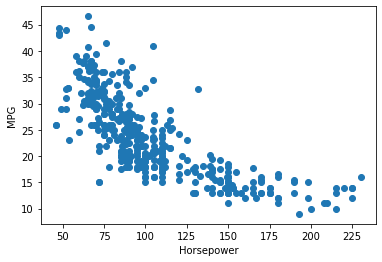

In [40]:
plt.scatter(df.horsepower, df.mpg)

plt.xlabel("Horsepower")
plt.ylabel("MPG")

plt.show()

In [49]:
%matplotlib inline

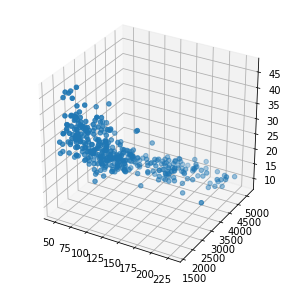

In [53]:
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(111,projection="3d")
ax.scatter(df.horsepower, df.weight, df.mpg) #x,y,z

plt.show()

### Sklearn ile LR

In [54]:
#features label
X = df.loc[:,["horsepower","weight"]].values
y = df.loc[:,"mpg"].values

print(f"X:{X.shape} y:{y.shape}")

X:(398, 2) y:(398,)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1) #varsayılan %25 test

print(f"X_train:{X_train.shape} y_train:{y_train.shape}")
print(f"X_test:{X_test.shape} y_train:{y_test.shape}")

X_train:(298, 2) y_train:(298,)
X_test:(100, 2) y_train:(100,)


In [60]:
%%time
modelLR = LinearRegression().fit(X_train, y_train)

print(f" y = {modelLR.coef_}x + {modelLR.intercept_}")

 y = [-0.0452868  -0.00602774]x + 46.11005289094973
CPU times: user 2.18 ms, sys: 369 µs, total: 2.55 ms
Wall time: 2.63 ms


In [62]:
y_test_predict = modelLR.predict(X_test)

pd.DataFrame(zip(y_test,y_test_predict), columns=["y_test", "y_test_predict"])

,y_test,y_test_predict
0,18.0,23.730448
1,28.1,23.017499
2,19.4,17.256280
3,20.3,24.387000
4,20.2,22.353660
...,...,...
95,18.0,24.769997
96,33.8,30.146328
97,25.0,29.495017
98,23.0,26.611709


In [64]:
mean_squared_error(y_test, y_test_predict) ** 0.5 #root_mean

3.6799169134955703

### Görselleştirme

In [73]:
%matplotlib notebook

<IPython.core.display.Javascript object>


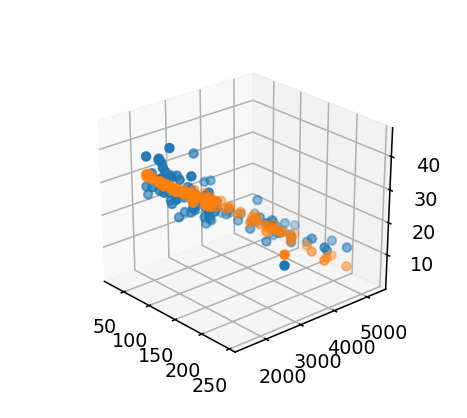

In [74]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111,projection="3d")
ax.scatter(X_test[:,0] , X_test[:,1], y_test)
ax.scatter(X_test[:,0] , X_test[:,1], y_test_predict)

plt.show()

### Modeli kaydedelim

### Pickle ile

In [75]:
with open("./modelMPG.pkl", mode="wb") as fw:
    fw.write(pickle.dumps(modelLR))

In [76]:
with open("./modelMPG.pkl", mode="rb") as fr:
    modelBin_read_file = pickle.loads(fr.read())

In [77]:
modelBin_read_file.predict(X_test)

array([23.73044792, 23.01749883, 17.25628039, 24.38699952, 22.35365978,
       13.23205338, 32.6372034 , 30.94539798, 16.79371882, 10.83961262,
       27.08591039, 16.65586805, 20.12103293, 25.45637277, 32.90472937,
       23.9202431 , 10.97683353, 23.10974786,  7.29388258, 30.99036986,
       26.37662708, 30.88386085, 26.66690353, 29.28572164, 23.93292844,
       32.27276114, 28.54834665, 31.79006932, 18.98021488, 26.36195138,
       23.37680145,  9.90216318, 24.21345468, 26.37678455, 25.60879844,
       13.47111607, 28.93983501,  6.07716662, 28.47229127, 27.39102   ,
       29.67212705, 25.47309549, 17.81471267, 29.55807232, 24.62716445,
       20.98116728, 20.42415218, 12.87515684, 29.62731264, 19.15738138,
       29.28572164, 24.4772582 , 15.10096863, 12.65569535, 29.84368153,
       28.15219104,  8.76386455, 14.29262122, 30.94476813, 31.23132212,
       30.82389834, 31.23132212, 16.15582364, 24.7029049 , 15.56772505,
       29.74477489, 25.26007746, 23.6799207 , 27.2968814 , 13.77